<a href="https://colab.research.google.com/github/SMatusik/heart_disease/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import bibliotek: numpy (obliczenia), pandas (manipulacja danymi), sklearn (machine learning), matplotlib (wykresy)
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
# odczyt pliku csv 
df_raw = pd.read_csv('data.csv')
df = df_raw.copy()

In [ ]:
# wyswietlenie informacji o kolumnach pobranych danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      294 non-null    int64  
 1   sex      294 non-null    int64  
 2   cp       294 non-null    int64  
 3   trestps  294 non-null    object 
 4   chol     294 non-null    object 
 5   fbs      294 non-null    object 
 6   restecg  294 non-null    object 
 7   thalach  294 non-null    object 
 8   exang    294 non-null    object 
 9   oldpeak  294 non-null    float64
 10  slope    294 non-null    object 
 11  ca       294 non-null    object 
 12  thal     294 non-null    object 
 13  num      294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
# wyswietlenie pierwszych pięciu wierszy obiektu df. Warto zauwazyć, że brakuje niektórych danych, jednak nie są oznaczone jako null
df.head()

,age,sex,cp,trestps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
# zamiana wartosci '?' na null
df = df.replace('?', np.nan)

In [ ]:
# ponowne wyswietlenie informacji o obiekcie - widac, ze wiele jest wartosci typu null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      294 non-null    int64  
 1   sex      294 non-null    int64  
 2   cp       294 non-null    int64  
 3   trestps  293 non-null    object 
 4   chol     271 non-null    object 
 5   fbs      286 non-null    object 
 6   restecg  293 non-null    object 
 7   thalach  293 non-null    object 
 8   exang    293 non-null    object 
 9   oldpeak  294 non-null    float64
 10  slope    104 non-null    object 
 11  ca       3 non-null      object 
 12  thal     28 non-null     object 
 13  num      294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


Opis zmiennych (za: http://archive.ics.uci.edu/ml/datasets/Heart+Disease):
1. age - wiek w latach
2. sex - płeć (1 - mężczyzna, 0 - kobieta)
3. cp - typ bólu w klatce piersiowej (1 - typowa dusznica, 2 - nietypowa dusznica, 3 - ból niezwiązany z dusznicą, 4 - brak objawów).
4. trestps - spoczynkowe ciśnienie krwi (w mmHg)
5. chol - cholesterol w mg/dl
6. fbs - wartość cukru we krwi na czczo (1 - większy niż 120mg/dl, 0 - mniejszy)
7. restecg - wyniki elektrokardiografu (0 - OK, 1 - anomalie fali ST oraz T, 2 - zwężenie lewej komory serca)
8. thalach - maksymalny puls 
9. exang -  czy ćwiczenia spodowoały dusznicę (1 - tak, 0 - nie)
10. oldpeak - obniżenie odcinka ST (1 - nie OK, 0 - OK)
11. slope - nachylenie odcinka ST (1 - narastające, 2 - płaskie, 3 - spadające)
12. ca - ilosc większych naczyń krwionośnycych pokolorowanych przez fluoroskopię. (0-3)
13. thal - niedokrwistość tarcznikowata (3 - normalna, 6 - stały defekt, 7 - uleczalny defekt).
14. num - diagnoza choroby serca (0 - < 50% zwężenia średnicy, 1 - > 50%).


In [ ]:
# wyrzucennie kolumn, które nie zawierają informacji dla >50% pacjentów.
df = df.drop(['slope', 'ca', 'thal'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      294 non-null    int64  
 1   sex      294 non-null    int64  
 2   cp       294 non-null    int64  
 3   trestps  293 non-null    object 
 4   chol     271 non-null    object 
 5   fbs      286 non-null    object 
 6   restecg  293 non-null    object 
 7   thalach  293 non-null    object 
 8   exang    293 non-null    object 
 9   oldpeak  294 non-null    float64
 10  num      294 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 25.4+ KB


In [ ]:
# zamiana danych z typu object na typ float64
object_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in object_cols:
  df[col] = df[col].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      294 non-null    int64  
 1   sex      294 non-null    int64  
 2   cp       294 non-null    int64  
 3   trestps  293 non-null    float64
 4   chol     271 non-null    float64
 5   fbs      286 non-null    float64
 6   restecg  293 non-null    float64
 7   thalach  293 non-null    float64
 8   exang    293 non-null    float64
 9   oldpeak  294 non-null    float64
 10  num      294 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.4 KB


In [ ]:
# uzupełnienie brakujących danych (w przypadku danych 0-1 uzupełnimy najczęściej uzupełnianą wartością, w przypadku danych liczbowych - wartością średnią).
trestps_mean = int(df['trestps'].mean())
chol_mean = int(df['chol'].mean())
thalach_mean = int(df['thalach'].mean())


fbs_mode = int(df['fbs'].mode())
restecg_mode = int(df['restecg'].mode())
exang_mode = int(df['exang'].mode())

df['trestps'].fillna(trestps_mean, inplace=True)
df['chol'].fillna(chol_mean, inplace=True)
df['thalach'].fillna(thalach_mean, inplace=True)

df['fbs'].fillna(fbs_mode, inplace=True)
df['restecg'].fillna(restecg_mode, inplace=True)
df['exang'].fillna(exang_mode, inplace=True)

In [ ]:
# sprawdzenie czy wszystkie dane zostały uzupelnione
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      294 non-null    int64  
 1   sex      294 non-null    int64  
 2   cp       294 non-null    int64  
 3   trestps  294 non-null    float64
 4   chol     294 non-null    float64
 5   fbs      294 non-null    float64
 6   restecg  294 non-null    float64
 7   thalach  294 non-null    float64
 8   exang    294 non-null    float64
 9   oldpeak  294 non-null    float64
 10  num      294 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.4 KB


In [ ]:
# zamiana danych na typ float
int_cols = [col for col in df.columns if df[col].dtype == 'int']
for col in int_cols:
  df[col] = df[col].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      294 non-null    float64
 1   sex      294 non-null    float64
 2   cp       294 non-null    float64
 3   trestps  294 non-null    float64
 4   chol     294 non-null    float64
 5   fbs      294 non-null    float64
 6   restecg  294 non-null    float64
 7   thalach  294 non-null    float64
 8   exang    294 non-null    float64
 9   oldpeak  294 non-null    float64
 10  num      294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
# podzielenie na dane opisujące i dane opisywane. Kolumna 'num' bedzie zawierała dane ktore będziemy chcieli przewidzieć
data = df.copy()
target = data.pop('num')


In [ ]:
# import klasy train_test_split, ktora automatycznie podzieli dane na dane treningowe i testowe
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.1)


In [ ]:
# zaimportowanie klasy z scikit o nazwie LogisticRegression i utworzenie obiektu tej klasy
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()


In [ ]:
# import klasy StandardScaler, ktora sluzy do przeskalowania danych, tak aby średnia ich rozkłądu była równa 0, a odchylenie standardowe równe 1
# standaryzacja dopasowywana jest do danych treningowych, a następnie wg obliczonych wspolczynników standaryzujemy dane testowe
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# metoda uczaca regresor dla danych treningowych
logistic_regressor.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# utworzenie obiektu zawierającego decyzje regresora dla danych testowych
Y_pred = logistic_regressor.predict(X_test)

Accuracy: 0.9


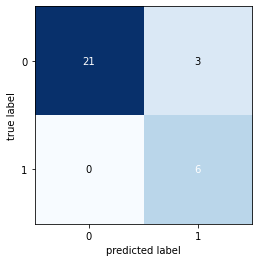

In [ ]:
# import bibliotek z sklearn oraz mlxtend sluzacych do narysowania macierzy pomyłek
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(Y_test, Y_pred)}')

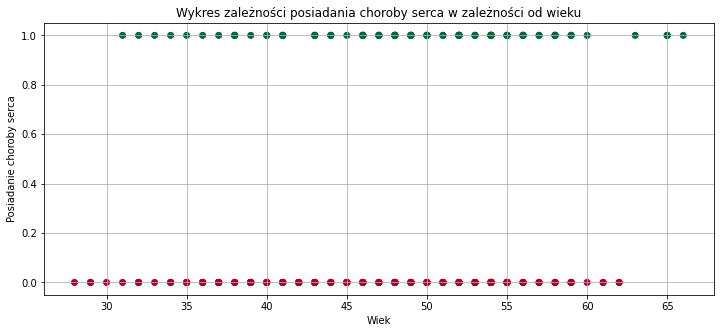

In [ ]:
# narysowanie wykresu danych pozytywnych (choroba serca) i negatywnych (brak choroby) w zależności od wieku
plt.figure(figsize=(12, 5))
plt.scatter(x= df['age'], y = df['num'], c= df['num'], cmap='RdYlGn')
plt.title('Wykres zależności posiadania choroby serca w zależności od wieku')
plt.xlabel('Wiek')
plt.ylabel('Posiadanie choroby serca')
plt.grid()
plt.show()

In [ ]:
# wyliczenie metryk klasyfikacji modelu
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        24
         1.0       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.83      0.94      0.87        30
weighted avg       0.93      0.90      0.91        30

